In [72]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.multicomp as mc
from wordlescraper.workup import add_features
from wordlescraper.gather import get_allwords, get_frequency

In [91]:
import os
os.chdir('/home/zacharygibbs/documents/dataengineering/wordlescraper')

# Load Data

In [16]:
df = pd.read_csv('wordlescraper/wordlestats_list.csv')
df = df.drop(['index', 'Unnamed: 0'], axis=1)
df = df.dropna(how='any')
df

,wordleid,date,wordleword,numresults,pct_1,pct_2,pct_3,pct_4,pct_5,pct_6,...,letter_matches_3,letter_matches_4,letter_matches_5,duplicate_letters,scrabblescore,num_vowels,starts_with_vowel,pctCG_good,pctCG_medium,pctCG_bad
0,353,2022-06-07,FLOOD,58991.0,0.0,3.0,20.0,40.0,28.0,8.0,...,201.0,102.0,32.0,1.0,9,2,0,23.0,40.0,37.0
1,352,2022-06-06,GLOOM,58478.0,0.0,2.0,14.0,35.0,35.0,13.0,...,215.0,103.0,32.0,1.0,8,2,0,16.0,35.0,49.0
2,351,2022-06-05,DEPTH,56738.0,0.0,6.0,28.0,39.0,20.0,6.0,...,232.0,27.0,3.0,0.0,11,1,0,34.0,39.0,27.0
3,350,2022-06-04,FROTH,58263.0,0.0,5.0,22.0,35.0,25.0,11.0,...,231.0,39.0,4.0,0.0,11,1,0,27.0,35.0,37.0
4,349,2022-06-03,PHASE,65431.0,1.0,13.0,38.0,32.0,13.0,3.0,...,327.0,75.0,3.0,0.0,10,2,0,52.0,32.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,206,2022-01-11,DRINK,153880.0,1.0,9.0,35.0,34.0,16.0,5.0,...,164.0,17.0,1.0,0.0,10,1,0,45.0,34.0,22.0
146,205,2022-01-10,QUERY,107134.0,1.0,4.0,16.0,30.0,30.0,17.0,...,196.0,29.0,3.0,0.0,17,2,0,21.0,30.0,49.0
147,204,2022-01-09,GORGE,91477.0,1.0,3.0,13.0,27.0,30.0,22.0,...,307.0,89.0,27.0,1.0,7,2,0,17.0,27.0,56.0
148,203,2022-01-08,CRANK,101503.0,1.0,5.0,23.0,31.0,24.0,14.0,...,243.0,34.0,3.0,0.0,11,1,0,29.0,31.0,40.0


In [73]:
df_allwords = get_allwords()

In [76]:
df_freq = get_frequency(False, './wordlescraper/unigram_freq.csv')

# Preprocess Data, Add Features

## Preprocessing for key columns has been moved into ETL script (workup.py)

word frequency - number of times these words show up in typical texts

matching letters - number of times a certain # of letters match w/ other words in the wordle possible word list

Repeated Letters

scrabble letter score

number of vowels

starts with vowel

In [18]:
df['wordleword']

0      FLOOD
1      GLOOM
2      DEPTH
3      FROTH
4      PHASE
       ...  
145    DRINK
146    QUERY
147    GORGE
148    CRANK
149    SLUMP
Name: wordleword, Length: 150, dtype: object

# coarse grain y variables

In [19]:
df['pctCG_good'] = df['pct_1'] + df['pct_2'] + df['pct_3']
df['pctCG_medium'] = df['pct_4']
df['pctCG_bad'] = df['pct_5'] + df['pct_6'] + df['pct_X']

# Charting

In [20]:
# Frequency Definitely has an effect (log freq)
# However, the noise is quite high.

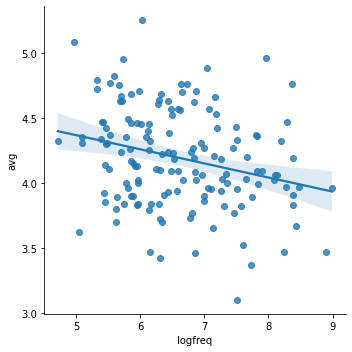

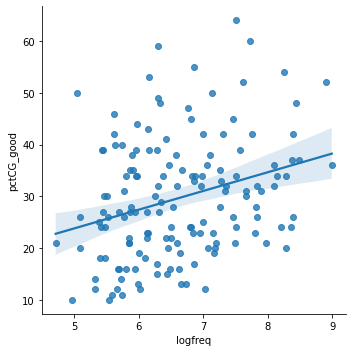

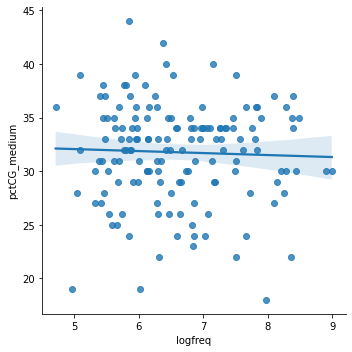

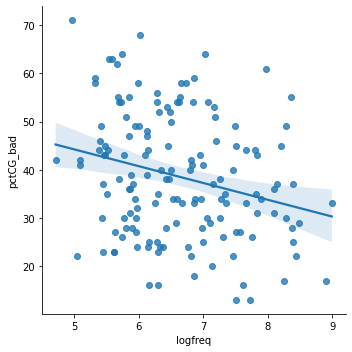

In [21]:
ax = sns.lmplot(x='logfreq', y='avg', data=df)
sns.lmplot(x='logfreq', y='pctCG_good', data=df)
sns.lmplot(x='logfreq', y='pctCG_medium', data=df)
sns.lmplot(x='logfreq', y='pctCG_bad', data=df)

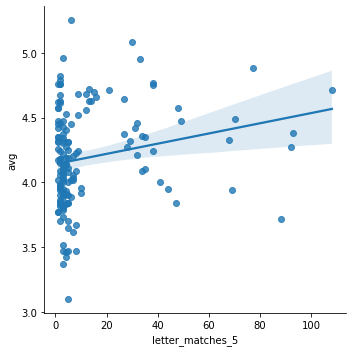

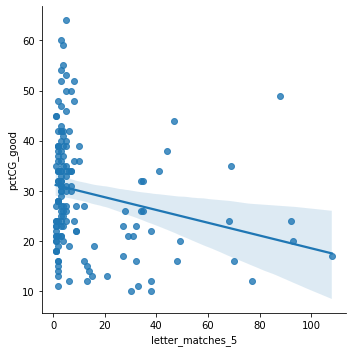

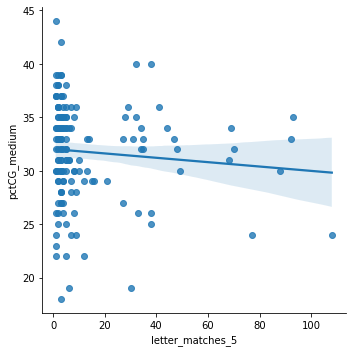

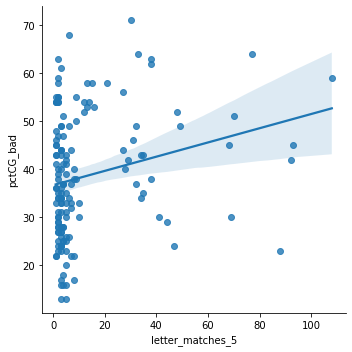

In [22]:
ax = sns.lmplot(x='letter_matches_5', y='avg', data=df)
sns.lmplot(x='letter_matches_5', y='pctCG_good', data=df)
sns.lmplot(x='letter_matches_5', y='pctCG_medium', data=df)
sns.lmplot(x='letter_matches_5', y='pctCG_bad', data=df)

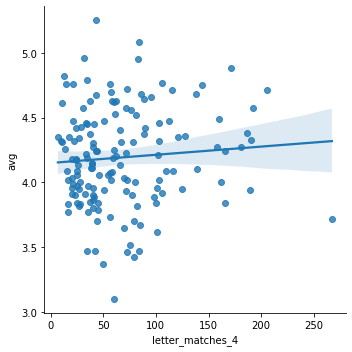

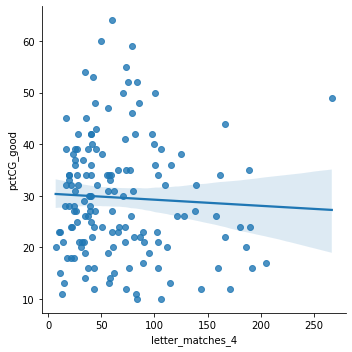

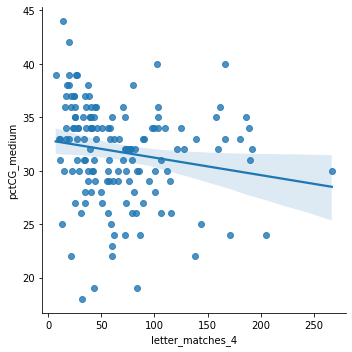

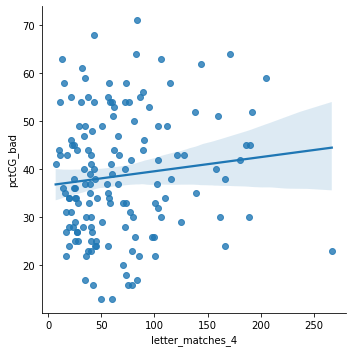

In [23]:
ax = sns.lmplot(x='letter_matches_4', y='avg', data=df)
sns.lmplot(x='letter_matches_4', y='pctCG_good', data=df)
sns.lmplot(x='letter_matches_4', y='pctCG_medium', data=df)
sns.lmplot(x='letter_matches_4', y='pctCG_bad', data=df)

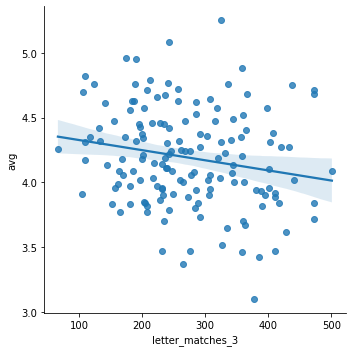

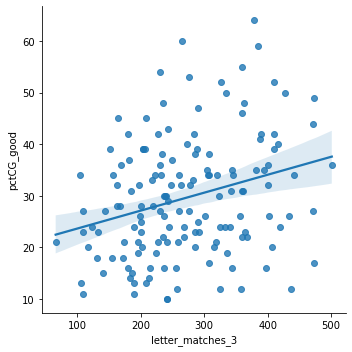

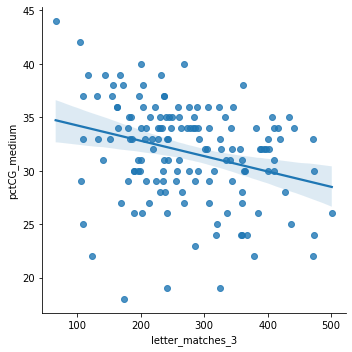

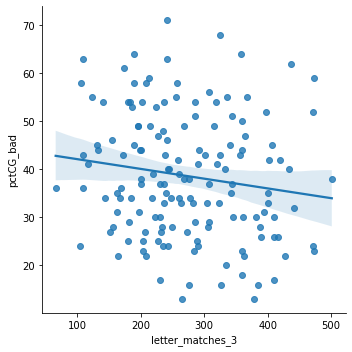

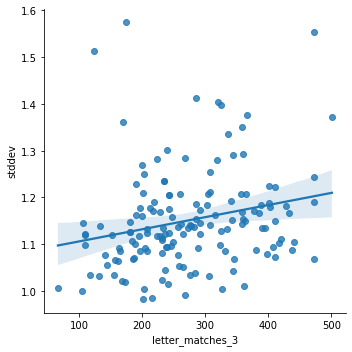

In [24]:
ax = sns.lmplot(x='letter_matches_3', y='avg', data=df)
sns.lmplot(x='letter_matches_3', y='pctCG_good', data=df)
sns.lmplot(x='letter_matches_3', y='pctCG_medium', data=df)
sns.lmplot(x='letter_matches_3', y='pctCG_bad', data=df)
sns.lmplot(x='letter_matches_3', y='stddev', data=df)

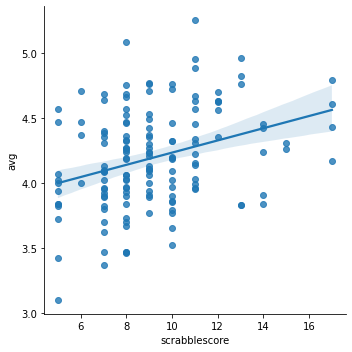

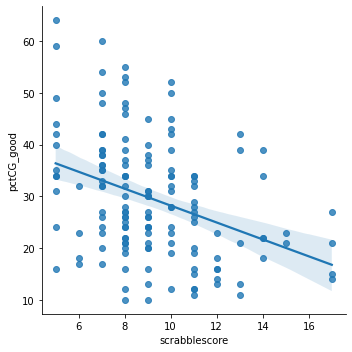

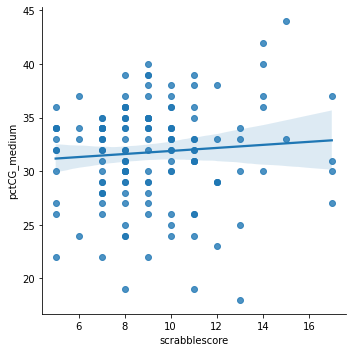

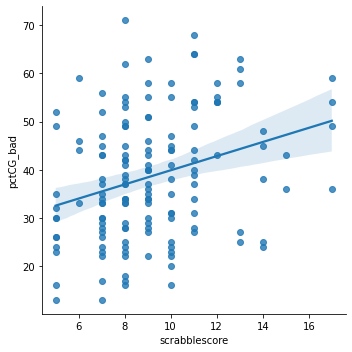

In [25]:
ax = sns.lmplot(x='scrabblescore', y='avg', data=df)
sns.lmplot(x='scrabblescore', y='pctCG_good', data=df)
sns.lmplot(x='scrabblescore', y='pctCG_medium', data=df)
sns.lmplot(x='scrabblescore', y='pctCG_bad', data=df)

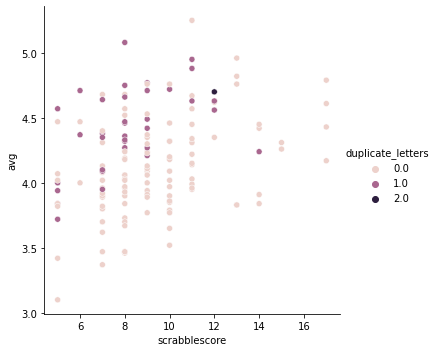

In [26]:
ax = sns.relplot(x='scrabblescore', y='avg', hue='duplicate_letters', data=df)

F_onewayResult(statistic=20.00583231873783, pvalue=1.5349497829584246e-05)
F_onewayResult(statistic=2.513365355809903, pvalue=0.11567922280888025)
F_onewayResult(statistic=0.7235663957885548, pvalue=0.4009275306553437)


<AxesSubplot:xlabel='duplicate_letters', ylabel='avg'>

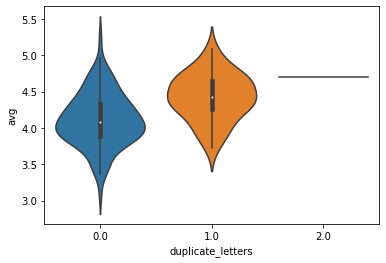

In [28]:
# Pretty Clearly there is a 'duplicate letter' effect w/ Average increasing quite a bit.
print(scipy.stats.f_oneway(
    df[df['duplicate_letters']==0]['avg'], 
    df[df['duplicate_letters']==1]['avg'],
))
print(scipy.stats.f_oneway(
    df[df['duplicate_letters']==0]['avg'], 
    df[df['duplicate_letters']==2]['avg'],
))
print(scipy.stats.f_oneway(
    df[df['duplicate_letters']==1]['avg'],
    df[df['duplicate_letters']==2]['avg'],
))
sns.violinplot(data=df, y='avg', x='duplicate_letters')

F_onewayResult(statistic=1.067082023867446, pvalue=0.30329052107876603)
F_onewayResult(statistic=0.4958793797450009, pvalue=0.48242283416540865)


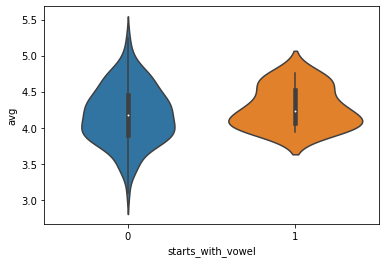

In [29]:
# not much difference in average for items that start w/ vowel
sns.violinplot(data=df, y='avg', x='starts_with_vowel')
print(scipy.stats.f_oneway(df[df['starts_with_vowel']==0]['avg'], df[df['starts_with_vowel']==1]['avg']))
print(scipy.stats.f_oneway(df[df['starts_with_vowel']==0]['pct_X'], df[df['starts_with_vowel']==1]['pct_X']))

F_onewayResult(statistic=0.03376299539241449, pvalue=0.8551176109898878)
F_onewayResult(statistic=0.018238863910274263, pvalue=0.8928868725089207)
F_onewayResult(statistic=0.12709942133596927, pvalue=0.7288660637763589)
F_onewayResult(statistic=0.0916656070993715, pvalue=0.7625656024677532)
F_onewayResult(statistic=0.07666622909958594, pvalue=0.7829862842741901)
F_onewayResult(statistic=0.2319071210232896, pvalue=0.631209269010498)


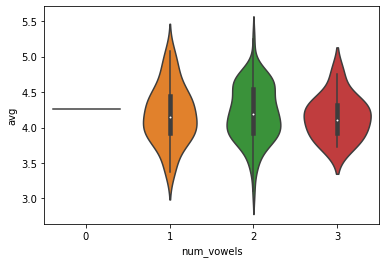

In [92]:
#not much effect w/ Number of Vowels
sns.violinplot(data=df, y='avg', x='num_vowels')
print(scipy.stats.f_oneway(
    df[df['num_vowels']==0]['avg'], 
    df[df['num_vowels']==1]['avg'],
))
print(scipy.stats.f_oneway(
    df[df['num_vowels']==0]['avg'], 
    df[df['num_vowels']==2]['avg'],
))
print(scipy.stats.f_oneway(
    df[df['num_vowels']==0]['avg'], 
    df[df['num_vowels']==3]['avg'],
))
print(scipy.stats.f_oneway(
    df[df['num_vowels']==1]['avg'],
    df[df['num_vowels']==2]['avg'],
))
print(scipy.stats.f_oneway(
    df[df['num_vowels']==1]['avg'],
    df[df['num_vowels']==3]['avg'],
))
print(scipy.stats.f_oneway(
    df[df['num_vowels']==2]['avg'],
    df[df['num_vowels']==3]['avg'],
))
#print(scipy.stats.f_oneway(df[df['starts_with_vowel']==0]['pct_X'], df[df['starts_with_vowel']==1]['pct_X']))

In [96]:
df.columns

Index(['wordleid', 'date', 'wordleword', 'numresults', 'pct_1', 'pct_2',
       'pct_3', 'pct_4', 'pct_5', 'pct_6', 'pct_X', 'avg', 'stddev', 'freq',
       'logfreq', 'letter_matches_2', 'letter_matches_3', 'letter_matches_4',
       'letter_matches_5', 'duplicate_letters', 'scrabblescore', 'pctCG_good',
       'pctCG_medium', 'pctCG_bad', 'starts_with_vowel', 'num_vowels'],
      dtype='object')

<AxesSubplot:>

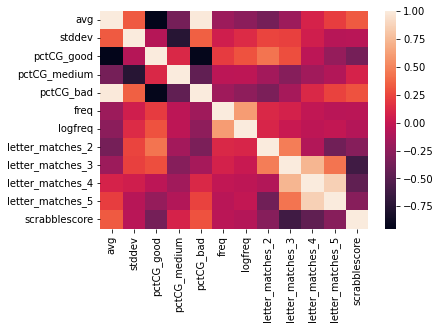

In [30]:
sns.heatmap(data=df[['avg', 'stddev', 'pctCG_good',
       'pctCG_medium', 'pctCG_bad', 'freq', 'logfreq', 'letter_matches_2', 'letter_matches_3', 'letter_matches_4', 'letter_matches_5',
       'scrabblescore']].corr())

In [31]:
df[['avg', 'stddev', 'pctCG_good',
       'pctCG_medium', 'pctCG_bad', 'freq', 'logfreq', 'letter_matches_2', 'letter_matches_3', 'letter_matches_4', 'letter_matches_5',
       'scrabblescore']].corr()['avg']

avg                 1.000000
stddev              0.323837
pctCG_good         -0.949391
pctCG_medium       -0.363823
pctCG_bad           0.985004
freq               -0.194211
logfreq            -0.267754
letter_matches_2   -0.363626
letter_matches_3   -0.193152
letter_matches_4    0.080434
letter_matches_5    0.213676
scrabblescore       0.323036
Name: avg, dtype: float64

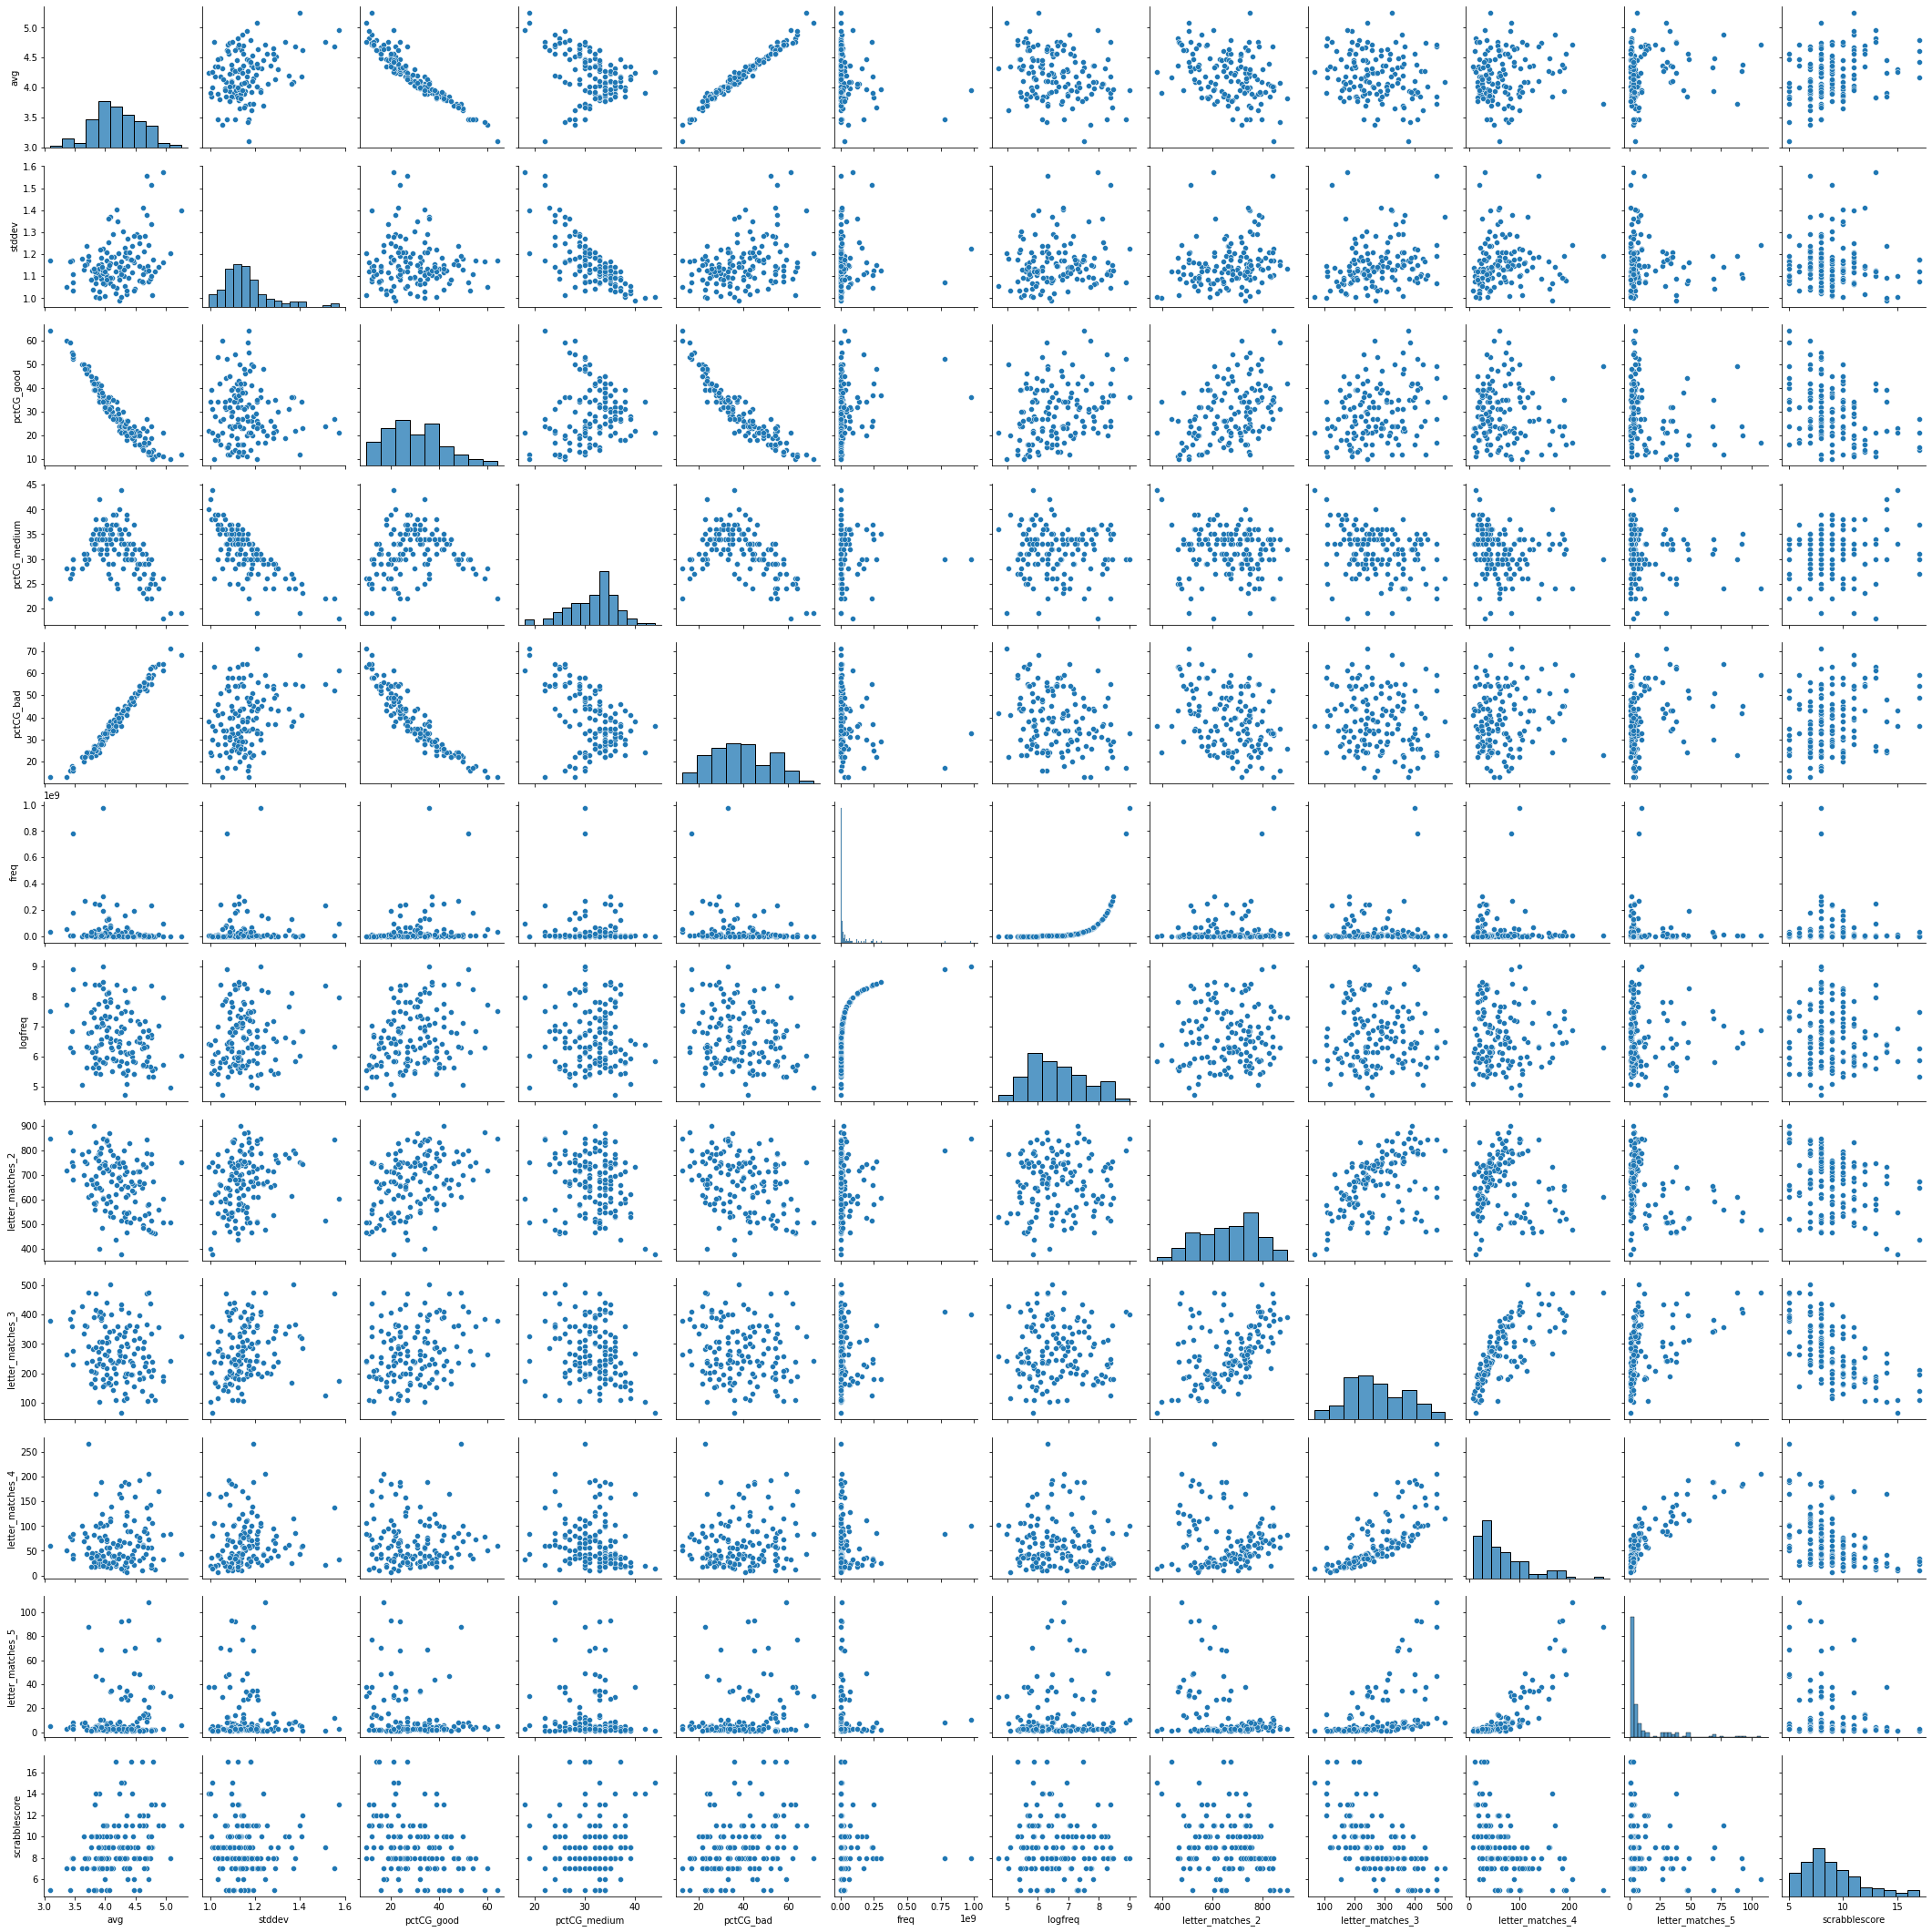

In [98]:
sns.pairplot(data=df[['avg', 'stddev', 'pctCG_good',
       'pctCG_medium', 'pctCG_bad', 'freq', 'logfreq', 'letter_matches_2', 'letter_matches_3', 'letter_matches_4', 'letter_matches_5',
       'scrabblescore']])

# Feature Selection

In [32]:
from sklearn import feature_selection, linear_model

In [33]:
#From Previous section - can drop the following based on statistics alone (although maybe shouldn't?)
drop_features = ['num_vowels', 'starts_with_vowel']
if drop_features[0] in df:
    df = df.drop(drop_features, axis=1)
df.columns

Index(['wordleid', 'date', 'wordleword', 'numresults', 'pct_1', 'pct_2',
       'pct_3', 'pct_4', 'pct_5', 'pct_6', 'pct_X', 'avg', 'stddev', 'freq',
       'logfreq', 'letter_matches_2', 'letter_matches_3', 'letter_matches_4',
       'letter_matches_5', 'duplicate_letters', 'scrabblescore', 'pctCG_good',
       'pctCG_medium', 'pctCG_bad'],
      dtype='object')

In [34]:
y = df['avg']
X = df.drop(['wordleid', 'date', 'wordleword', 'numresults', 'pct_1', 'pct_2',
       'pct_3', 'pct_4', 'pct_5', 'pct_6', 'pct_X', 'avg', 'stddev', 'freq', 'pctCG_good',
       'pctCG_medium', 'pctCG_bad'], axis=1)
X

,logfreq,letter_matches_2,letter_matches_3,letter_matches_4,letter_matches_5,duplicate_letters,scrabblescore
0,7.145484,530.0,201.0,102.0,32.0,1.0,9
1,5.943503,500.0,215.0,103.0,32.0,1.0,8
2,7.503517,711.0,232.0,27.0,3.0,0.0,11
3,5.444777,617.0,231.0,39.0,4.0,0.0,11
4,7.609839,748.0,327.0,75.0,3.0,0.0,10
...,...,...,...,...,...,...,...
145,7.466199,619.0,164.0,17.0,1.0,0.0,10
146,7.495327,674.0,196.0,29.0,3.0,0.0,17
147,6.290093,666.0,307.0,89.0,27.0,1.0,7
148,6.339493,687.0,243.0,34.0,3.0,0.0,11


In [35]:
model = linear_model.LinearRegression()
rfecv = feature_selection.RFECV(model, cv=5)
rfecv.fit(X,y)
rfecv.get_feature_names_out()
#wants to get rid of the letter_matches

array(['logfreq', 'duplicate_letters', 'scrabblescore'], dtype=object)

In [36]:
sfs = feature_selection.SequentialFeatureSelector(model, n_features_to_select=4, direction='forward', cv=5)
sfs.fit(X,y)
sfs.get_feature_names_out()

array(['logfreq', 'letter_matches_2', 'duplicate_letters',
       'scrabblescore'], dtype=object)

In [37]:
#letter_matches_3 vs scrabblescore; when scrabble score is included as possibility; it does a better job

In [38]:
sm_mod = sm.OLS(y,sm.add_constant(X[['logfreq', 'duplicate_letters', 'scrabblescore']]))
sm_mod_res = sm_mod.fit()
sm_mod_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    avg   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     22.93
Date:                Wed, 08 Jun 2022   Prob (F-statistic):           3.21e-12
Time:                        22:49:13   Log-Likelihood:                -38.180
No. Observations:                 150   AIC:                             84.36
Df Residuals:                     146   BIC:                             96.40
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.1663      0.218     19.104      0.000       3.735       4.597
logfreq              -0.0831      0.028     -2.983      0.003      -0.138      -0.028
duplicate_letters     0.3426      0.059      5.818      0.000       0.226       0.459
scrabblescore         0.0537      0.010      5.326      0.000       0.034       0.074
==============================================================================
Omnibus:                        1.812   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.404   Jarque-Bera (JB):                1.523
Skew:                           0.243   Prob(JB):                        0.467
Kurtosis:                       3.085   Cond. No.                         98.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model Selection

In [39]:
from sklearn import preprocessing, model_selection, metrics, neighbors, neural_network, svm, tree, ensemble
import joblib

In [40]:
X = X[['logfreq', 'duplicate_letters', 'scrabblescore']]
print(y)
print(X)

0      4.21
1      4.46
2      3.95
3      4.14
4      3.52
       ... 
145    3.77
146    4.43
147    4.64
148    4.22
149    4.13
Name: avg, Length: 150, dtype: float64
      logfreq  duplicate_letters  scrabblescore
0    7.145484                1.0              9
1    5.943503                1.0              8
2    7.503517                0.0             11
3    5.444777                0.0             11
4    7.609839                0.0             10
..        ...                ...            ...
145  7.466199                0.0             10
146  7.495327                0.0             17
147  6.290093                1.0              7
148  6.339493                0.0             11
149  5.943820                0.0              9

[150 rows x 3 columns]


In [42]:
scl_x = preprocessing.StandardScaler()
X_scl = scl_x.fit_transform(X)
scl_y = preprocessing.MinMaxScaler()
y_scl = scl_y.fit_transform(np.array([y]).transpose())
joblib.dump(scl_x, './wordlescraper/scl_x.pickle')
joblib.dump(scl_y, './wordlescraper/scl_y.pickle')
y_scl

array([[0.51627907],
       [0.63255814],
       [0.39534884],
       [0.48372093],
       [0.19534884],
       [0.61395349],
       [0.5627907 ],
       [0.45581395],
       [0.41860465],
       [0.56744186],
       [0.41860465],
       [0.34418605],
       [0.39069767],
       [0.8       ],
       [0.46046512],
       [0.46976744],
       [0.40465116],
       [0.39069767],
       [0.66046512],
       [0.59069767],
       [0.3255814 ],
       [0.50697674],
       [0.64651163],
       [0.66511628],
       [0.36744186],
       [0.34883721],
       [0.6372093 ],
       [0.37209302],
       [0.58139535],
       [0.29302326],
       [0.75348837],
       [0.50232558],
       [0.53023256],
       [0.77209302],
       [0.        ],
       [0.43255814],
       [0.44651163],
       [0.77674419],
       [0.76744186],
       [0.16744186],
       [0.78604651],
       [0.41395349],
       [0.27906977],
       [0.71162791],
       [0.42790698],
       [0.44651163],
       [0.1255814 ],
       [0.772

In [43]:
X_scl_train, X_scl_test, y_scl_train, y_scl_test = model_selection.train_test_split(X_scl, y_scl, train_size=0.8, shuffle=True)

In [44]:
model = linear_model.LinearRegression()
res = model_selection.cross_val_score(model, X_scl_train, y_scl_train, scoring=metrics.make_scorer(metrics.r2_score), cv=5)
print(res.mean(), str(model.__class__))

0.23077904590336112 <class 'sklearn.linear_model._base.LinearRegression'>


In [45]:
model = linear_model.ElasticNet()
res = model_selection.cross_val_score(model, X_scl_train, y_scl_train, scoring=metrics.make_scorer(metrics.r2_score), cv=5)
print(res.mean(), str(model.__class__))

-0.03815657228311253 <class 'sklearn.linear_model._coordinate_descent.ElasticNet'>


In [46]:
model = linear_model.Ridge()
res = model_selection.cross_val_score(model, X_scl_train, y_scl_train, scoring=metrics.make_scorer(metrics.r2_score), cv=5)
print(res.mean(), str(model.__class__))

0.23180157056948641 <class 'sklearn.linear_model._ridge.Ridge'>


In [47]:
model = neighbors.KNeighborsRegressor(n_neighbors=4)
res = model_selection.cross_val_score(model, X_scl_train, y_scl_train, scoring=metrics.make_scorer(metrics.r2_score), cv=5)
print(res.mean(), str(model.__class__))

-0.02659802466586403 <class 'sklearn.neighbors._regression.KNeighborsRegressor'>


In [48]:
model = neural_network.MLPRegressor()
res = model_selection.cross_val_score(model, X_scl_train, y_scl_train, scoring=metrics.make_scorer(metrics.r2_score), cv=5)
print(res.mean(), str(model.__class__))

/home/zacharygibbs/miniconda3/envs/datascience/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/zacharygibbs/miniconda3/envs/datascience/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/zacharygibbs/miniconda3/envs/datascience/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/zacharygibbs/miniconda3/envs/datascie

-0.1067514688436676 <class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>


In [49]:
model = svm.SVR()
res = model_selection.cross_val_score(model, X_scl_train, y_scl_train, scoring=metrics.make_scorer(metrics.r2_score), cv=5)
print(res.mean(), str(model.__class__))

0.019302004945104412 <class 'sklearn.svm._classes.SVR'>


/home/zacharygibbs/miniconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/zacharygibbs/miniconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/zacharygibbs/miniconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/zacharygibbs/miniconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:993: D

In [50]:
model = tree.DecisionTreeRegressor()
res = model_selection.cross_val_score(model, X_scl_train, y_scl_train, scoring=metrics.make_scorer(metrics.r2_score), cv=5)
print(res.mean(), str(model.__class__))

-0.8511385393212254 <class 'sklearn.tree._classes.DecisionTreeRegressor'>


In [51]:
model = ensemble.RandomForestRegressor()
res = model_selection.cross_val_score(model, X_scl_train, y_scl_train, scoring=metrics.make_scorer(metrics.r2_score), cv=5)
print(res.mean(), str(model.__class__))

/home/zacharygibbs/miniconda3/envs/datascience/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/zacharygibbs/miniconda3/envs/datascience/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/zacharygibbs/miniconda3/envs/datascience/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


-0.025036869211811252 <class 'sklearn.ensemble._forest.RandomForestRegressor'>


/home/zacharygibbs/miniconda3/envs/datascience/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/zacharygibbs/miniconda3/envs/datascience/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [52]:
model = ensemble.AdaBoostRegressor()
res = model_selection.cross_val_score(model, X_scl_train, y_scl_train, scoring=metrics.make_scorer(metrics.r2_score), cv=5)
print(res.mean(), str(model.__class__))

0.11892506924329922 <class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'>


/home/zacharygibbs/miniconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/zacharygibbs/miniconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/zacharygibbs/miniconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/zacharygibbs/miniconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:993: D

In [53]:
model = ensemble.ExtraTreesRegressor()
res = model_selection.cross_val_score(model, X_scl_train, y_scl_train, scoring=metrics.make_scorer(metrics.r2_score), cv=5)
print(res.mean(), str(model.__class__))

/home/zacharygibbs/miniconda3/envs/datascience/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/zacharygibbs/miniconda3/envs/datascience/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/zacharygibbs/miniconda3/envs/datascience/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/zacharygibbs/miniconda3/envs

-0.10049091059477766 <class 'sklearn.ensemble._forest.ExtraTreesRegressor'>


/home/zacharygibbs/miniconda3/envs/datascience/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [54]:
model = ensemble.GradientBoostingRegressor()
res = model_selection.cross_val_score(model, X_scl_train, y_scl_train, scoring=metrics.make_scorer(metrics.r2_score), cv=5)
print(res.mean(), str(model.__class__))

0.011464514674875192 <class 'sklearn.ensemble._gb.GradientBoostingRegressor'>


/home/zacharygibbs/miniconda3/envs/datascience/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/zacharygibbs/miniconda3/envs/datascience/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/zacharygibbs/miniconda3/envs/datascience/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/zacharygibbs/miniconda3/envs/datascience/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWar

In [55]:
#By far - the linear / Ridge are the best in the first shot

# Hyperparameter tuning

In [56]:
alphas = np.logspace(-3, 1.5, 100)
ress = []
for alpha in alphas:
    model = linear_model.Ridge(alpha=alpha)
    res = model_selection.cross_val_score(model, X_scl_train, y_scl_train, scoring=metrics.make_scorer(metrics.r2_score), cv=5)
    model.fit(X_scl_train, y_scl_train)
    ress.append(res.mean())

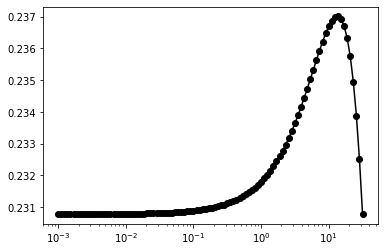

In [57]:
plt.semilogx(alphas, ress, 'ko-')
best_alpha = alphas[ress.index(max(ress))]

In [58]:
model = linear_model.Ridge(alpha=best_alpha)
res = model_selection.cross_val_score(model, X_scl_train, y_scl_train, scoring=metrics.make_scorer(metrics.r2_score), cv=5)
print(res.mean(), str(model.__class__))
model.fit(X_scl_train, y_scl_train)
print(model.score(X_scl_train, y_scl_train))
print(model.score(X_scl_test, y_scl_test))
#test error is a bit higher than train / CV

0.23700671203164755 <class 'sklearn.linear_model._ridge.Ridge'>
0.29809741007519897
0.37125420759354677


In [59]:
best_alpha

13.68874509537082

# Fit Final Model

In [60]:
model = linear_model.Ridge(alpha=best_alpha)
res = model_selection.cross_val_score(model, X_scl, y_scl, scoring=metrics.make_scorer(metrics.r2_score), cv=5)
print(res.mean(), str(model.__class__))
model.fit(X_scl, y_scl)
print(model.score(X_scl, y_scl))
print(model.score(X_scl_test, y_scl_test))
print(model.score(X_scl_train, y_scl_train))
#test error is a bit higher than train / CV
joblib.dump(model, './wordlescraper/ridge_model.pickle')

0.2416229484850275 <class 'sklearn.linear_model._ridge.Ridge'>
0.3176778700297799
0.3896572836596349
0.30002419971420646


['ridge_model.pickle']

# Prepare prediction pipeline

In [93]:
scl_x = joblib.load('./wordlescraper/scl_x.pickle')
scl_y = joblib.load('./wordlescraper/scl_y.pickle')
model = joblib.load('./wordlescraper/ridge_model.pickle')

In [94]:
words_trial = ['BADGE', 'GREEN', 'ZOOMS', 'THERE', 'THEIR', 'SQUAD', 'QUACK']
df_trial = pd.DataFrame({'wordleword':words_trial})
df_trial = add_features(df_trial, all_words=df_allwords, df_freq=df_freq)
X_trial = df_trial[['logfreq', 'duplicate_letters', 'scrabblescore']]
X_scl_trial = scl_x.transform(X_trial)

pd.DataFrame({'wordleword':words_trial, 'avg':scl_y.inverse_transform(model.predict(X_scl_trial)).transpose()[0,:]})

,wordleword,avg
0,BADGE,4.095071
1,GREEN,4.161941
2,ZOOMS,4.840242
3,THERE,4.195482
4,THEIR,3.881505
5,SQUAD,4.374441
6,QUACK,4.715711
